- Import required libraries.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re
import seaborn as sns
sns.set_style("whitegrid")

- Open and read the data sets.

In [89]:
income = pd.read_csv('datasets/MedianHouseholdIncome2015.csv', encoding='windows-1251')

In [90]:
poverty = pd.read_csv('datasets/PercentagePeopleBelowPovertyLevel.csv', encoding='windows-1251')

In [91]:
education = pd.read_csv('datasets/PercentOver25CompletedHighSchool.csv', encoding='windows-1251')

In [92]:
killings = pd.read_csv('datasets/PoliceKillingsUS.csv', encoding='windows-1251')

In [93]:
city_race = pd.read_csv('datasets/ShareRaceByCity.csv', encoding='windows-1251')

In [94]:
income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [95]:
income['Geographic Area'].nunique()

51

In [96]:
city_samp = city_race.sample(frac=0.25, replace=False, random_state=0, axis=0)

In [97]:
city_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7317 entries, 20414 to 22006
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        7317 non-null   object
 1   City                   7317 non-null   object
 2   share_white            7317 non-null   object
 3   share_black            7317 non-null   object
 4   share_native_american  7317 non-null   object
 5   share_asian            7317 non-null   object
 6   share_hispanic         7317 non-null   object
dtypes: object(7)
memory usage: 457.3+ KB


In [98]:
city_samp.index.duplicated().sum()

0

In [99]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [100]:
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [101]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [102]:
education.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [103]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [104]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [105]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [106]:
city_race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [107]:
city_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


- I will concatenate the `income`, `poverty`, `education` and `city_race` dataframes for compact analysis.

In [108]:
data = pd.concat([poverty, education, income, city_race], axis=1)

In [109]:
data.sample(10)

,Geographic Area,City,poverty_rate,Geographic Area,City,percent_completed_hs,Geographic Area,City,Median Income,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
26119,TX,Timpson city,42.7,TX,Timpson city,70.8,TX,Tomball city,44086,TX,Venus town,79.4,13.2,0.5,1.7,24.8
20016,OH,Painesville city,23,OH,Painesville city,78.1,OH,Parma city,50440,OH,Pleasant Run CDP,79.8,14.5,0.5,1.8,2.2
15984,NJ,East Rutherford borough,10.1,NJ,East Rutherford borough,92.9,NJ,Ellisburg CDP,61544,NJ,Farmingdale borough,89.6,2.9,0.5,3.2,6.9
14734,MT,Camas CDP,48.6,MT,Camas CDP,87.5,MT,Charlo CDP,44583,MT,Conrad city,95.1,0.2,1.8,0.3,1.5
18451,NC,Marshville town,28.9,NC,Marshville town,71.1,NC,Maysville town,24432,NC,Morganton city,70.1,12.2,0.9,2.4,16.4
28940,WI,Richfield village,2.8,WI,Richfield village,95.8,WI,River Hills village,156250,WI,Spooner city,95.1,0.3,1.9,0.7,1.3
1442,AR,Blue Eye town,74.4,AR,Blue Eye town,16.7,AR,Blue Eye town,(X),AR,Booneville city,93.5,1,0.9,0.6,3.2
25763,TX,Point Comfort city,7.3,TX,Point Comfort city,89.2,TX,Portland city,62561,TX,Ramos CDP,76.7,0,0,0,100
7761,IN,Little York town,20.1,IN,Little York town,77.8,IN,Logansport city,32982,IN,Lowell town,95.9,0.5,0.4,0.3,6.9
1592,AR,Greers Ferry city,13,AR,Greers Ferry city,81.1,AR,Greers Ferry city,31810,AR,Hackett city,92,0.1,3.4,0.6,0.6


In [110]:
#rename the columns
data.columns = ['state', 'city', 'poverty_rate', 'Geographic_Area_x', 'City_x',
       'education', 'Geographic_Area_y', 'City_y', 'income',
       'Geographic_area_z', 'City_z', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic']

- The cities are not the same, but the areas(state) are. In this case I will perform my analysis based on geographic area.

In [111]:
data.drop(['Geographic_Area_x', 'City_x', 'Geographic_Area_y', 'City_y', 'Geographic_area_z', 'City_z'], 
          axis=1, inplace=True)

In [112]:
data.sample(20)

,state,city,poverty_rate,education,income,share_white,share_black,share_native_american,share_asian,share_hispanic
18204,NC,Dellview town,0,100,23616,79.3,17.1,0.3,0,2.1
10302,KY,White Plains city,14.4,82.3,57334,94.1,1.6,0,0,0
20058,OH,Plumwood CDP,6.2,80.3,53421,48.5,44.9,0.1,4.3,1.8
20849,OK,Mulhall town,28.6,89.4,-,88.2,0,10.6,0,0
23114,PA,Utica borough,20.5,84.3,45469,98.6,0.3,0.1,0.4,1
21753,PA,Centre Hall borough,6,94.9,53750,98.2,0.3,0,0.4,0.9
11271,MD,Nanticoke Acres CDP,52.6,50,57665,65.3,23,0.4,5.5,5.9
12766,MN,Hoffman city,21.8,87.7,45000,94.7,1.1,0.5,0.7,2.8
21915,PA,Eagles Mere borough,2.5,100,56827,95.7,1.2,0.2,1.5,0.8
4443,FL,Hastings town,26.3,81.8,36196,97,0.7,0.4,0.4,4.3


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  29329 non-null  object
 1   city                   29329 non-null  object
 2   poverty_rate           29329 non-null  object
 3   education              29329 non-null  object
 4   income                 29271 non-null  object
 5   share_white            29268 non-null  object
 6   share_black            29268 non-null  object
 7   share_native_american  29268 non-null  object
 8   share_asian            29268 non-null  object
 9   share_hispanic         29268 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


In [114]:
killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


- Data Cleaning and Prerocessing
    - filling in missing values and changing data types

In [115]:
#check for missing values
data.isnull().sum()

state                     0
city                      0
poverty_rate              0
education                 0
income                   58
share_white              61
share_black              61
share_native_american    61
share_asian              61
share_hispanic           61
dtype: int64

- These are blocks of code that clean the object columns and convert them to float data types.

In [116]:
data.columns

Index(['state', 'city', 'poverty_rate', 'education', 'income', 'share_white',
       'share_black', 'share_native_american', 'share_asian',
       'share_hispanic'],
      dtype='object')

In [117]:
#income column
#remove characters that are not digits
data['income_col'] = data['income'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

#remove existing spaces and join the digits
data['income_col'] = data['income_col'].apply(lambda x: "".join(str(x).split()))

#fill in entire spaces with zero as a string
data.loc[data['income_col'] == "", 'income_col'] = '0'

#drop the original column
data.drop('income', axis=1, inplace=True)

#change the type from object to float and rename the column
data['income'] = data['income_col'].astype('float')

#drop the redundant column
data.drop('income_col', axis=1, inplace=True)

In [118]:
#poverty column
data['poverty_col'] = data['poverty_rate'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['poverty_col'] = data['poverty_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['poverty_col'] == "", 'poverty_col'] = '0'

#change the type from object to float
data['poverty_rate'] = data['poverty_col'].astype('float')

#drop the redundant column
data.drop('poverty_col', axis=1, inplace=True)

In [119]:
#education column
data['education_col'] = data['education'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['education_col'] = data['education_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['education_col'] == "", 'education_col'] = '0'

#change the type from object to float
data['education'] = data['education_col'].astype('float')

#drop the redundant column
data.drop('education_col', axis=1, inplace=True)

In [120]:
#share_white column
data['share_white_col'] = data['share_white'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['share_white_col'] = data['share_white_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['share_white_col'] == "", 'share_white_col'] = '0'

#change the type from object to float
data['share_white'] = data['share_white_col'].astype('float')

#drop the redundant column
data.drop('share_white_col', axis=1, inplace=True)

In [121]:
#share_black column
data['share_black_col'] = data['share_black'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['share_black_col'] = data['share_black_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['share_black_col'] == "", 'share_black_col'] = '0'

#change the type from object to float
data['share_black'] = data['share_black_col'].astype('float')

#drop the redundant column
data.drop('share_black_col', axis=1, inplace=True)

In [122]:
#share_native_american column
data['share_native_american_col'] = data['share_native_american'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['share_native_american_col'] = data['share_native_american_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['share_native_american_col'] == "", 'share_native_american_col'] = '0'

#change the type from object to float
data['share_native_american'] = data['share_native_american_col'].astype('float')

#drop the redundant column
data.drop('share_native_american_col', axis=1, inplace=True)

In [123]:
#share_asian column
data['share_asian_col'] = data['share_asian'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['share_asian_col'] = data['share_asian_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['share_asian_col'] == "", 'share_asian_col'] = '0'

#change the type from object to float
data['share_asian'] = data['share_asian_col'].astype('float')

#drop the redundant column
data.drop('share_asian_col', axis=1, inplace=True)

In [124]:
#share_hispanic column
data['share_hispanic_col'] = data['share_hispanic'].apply(lambda x: re.sub(r"[^0-9]", "", str(x)))

data['share_hispanic_col'] = data['share_hispanic_col'].apply(lambda x: "".join(str(x).split()))

data.loc[data['share_hispanic_col'] == "", 'share_hispanic_col'] = '0'

#change the type from object to float
data['share_hispanic'] = data['share_hispanic_col'].astype('float')

#drop the redundant column
data.drop('share_hispanic_col', axis=1, inplace=True)

In [125]:
killings.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

- I will fill in the missing values in various columns and also categorize some columns in the killings dataframe.

In [126]:
age_median = killings['age'].median()
killings['age'].fillna(age_median, inplace=True)

In [127]:
top_race = killings['race'].describe().top
killings['race'].fillna(top_race, inplace=True)

In [128]:
top_flee = killings['flee'].describe().top
killings['flee'].fillna(top_flee, inplace=True)

In [129]:
top_armed = killings['armed'].describe().top
killings['armed'].fillna(top_armed, inplace=True)

In [130]:
killings.loc[killings['threat_level'] == 'attack', 'threat_level'] = 'high'
killings.loc[killings['threat_level'] == 'other', 'threat_level'] = 'medium'
killings.loc[killings['threat_level'] == 'undetermined', 'threat_level'] = 'low'

In [131]:
killings['threat_level'] = killings['threat_level'].astype('category')

In [132]:
killings['manner_of_death'] = killings['manner_of_death'].astype('category')

In [133]:
killings['gender'] = killings['gender'].astype('category')

In [134]:
killings['date'] = pd.to_datetime(killings['date'], errors='coerce')

### Exploratory Data Analysis

In [135]:
data.describe()

,poverty_rate,education,share_white,share_black,share_native_american,share_asian,share_hispanic,income
count,29329.000000,29329.000000,29329.000000,29329.000000,29329.000000,29329.000000,29329.000000,29329.000000
mean,146.864400,739.397456,724.943946,62.463159,25.732892,14.073340,82.036142,47991.033619
std,127.664304,291.350599,326.169477,150.394184,118.513092,40.698589,161.614495,27783.222116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,736.000000,605.000000,1.000000,1.000000,0.000000,8.000000,33333.000000
50%,121.000000,858.000000,894.000000,7.000000,3.000000,4.000000,25.000000,43750.000000
75%,212.000000,921.000000,962.000000,35.000000,8.000000,11.000000,71.000000,57969.000000
max,986.000000,999.000000,999.000000,995.000000,997.000000,671.000000,999.000000,250000.000000


In [136]:
killings.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,2535.000000,2535,2535,2535,2535,2535.000000,2535,2535,2535,2535,2535,2535,2535,2535
unique,NaN,2481,879,2,68,NaN,2,6,1417,51,2,3,4,2
top,NaN,TK TK,2017-01-24 00:00:00,shot,gun,NaN,M,W,Los Angeles,CA,False,high,Not fleeing,False
freq,NaN,49,8,2363,1407,NaN,2428,1396,39,424,1902,1611,1760,2264
first,NaN,NaN,2015-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1445.731755,NaN,NaN,NaN,NaN,36.526233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,794.259490,NaN,NaN,NaN,NaN,12.839056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,768.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29329 non-null  object 
 1   city                   29329 non-null  object 
 2   poverty_rate           29329 non-null  float64
 3   education              29329 non-null  float64
 4   share_white            29329 non-null  float64
 5   share_black            29329 non-null  float64
 6   share_native_american  29329 non-null  float64
 7   share_asian            29329 non-null  float64
 8   share_hispanic         29329 non-null  float64
 9   income                 29329 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


In [138]:
data.head()

,state,city,poverty_rate,education,share_white,share_black,share_native_american,share_asian,share_hispanic,income
0,AL,Abanda CDP,788.0,212.0,672.0,302.0,0.0,0.0,16.0,11207.0
1,AL,Abbeville city,291.0,691.0,544.0,414.0,1.0,1.0,31.0,25615.0
2,AL,Adamsville city,255.0,789.0,523.0,449.0,5.0,3.0,23.0,42575.0
3,AL,Addison town,307.0,814.0,991.0,1.0,0.0,1.0,4.0,37083.0
4,AL,Akron town,42.0,686.0,132.0,865.0,0.0,0.0,3.0,21667.0


In [139]:
total_state_income = pd.pivot_table(data, values='income', index='state', aggfunc='sum')

In [140]:
total_state_income.head()

,income
state,
AK,14900484.0
AL,22155211.0
AR,18366199.0
AZ,15810888.0
CA,84771828.0


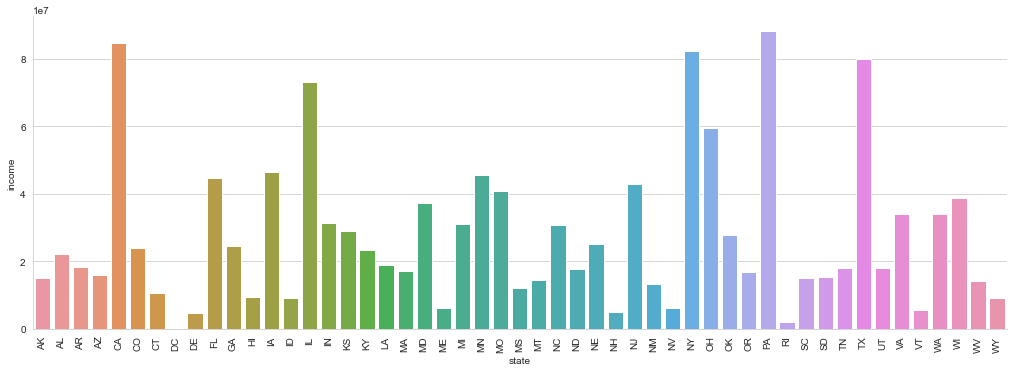

In [141]:
sns.catplot(x=total_state_income.index, y='income', data=total_state_income, kind='bar', height=5, aspect=14/5)
plt.xticks(rotation=90)

# Show plot
plt.show()

In [142]:
avg_state_poverty = pd.pivot_table(data, values='poverty_rate', index='state', aggfunc='mean') 

In [143]:
avg_state_poverty.head()

,poverty_rate
state,
AK,164.602817
AL,187.502564
AR,205.609982
AZ,221.889135
CA,148.695795


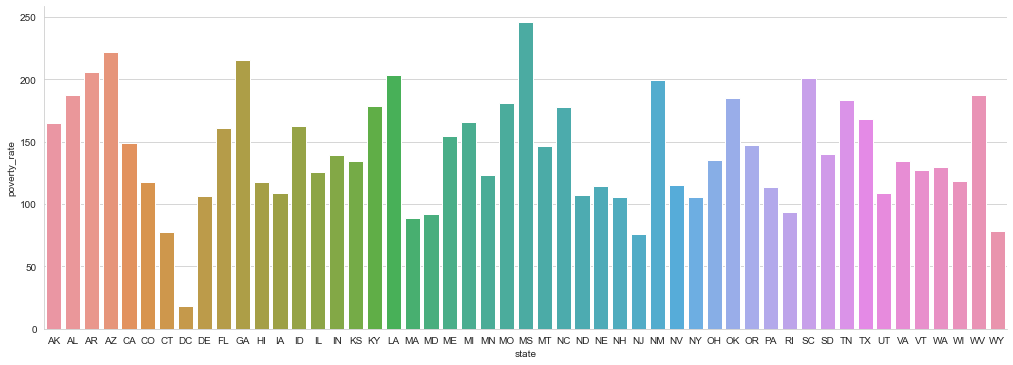

In [145]:
sns.catplot(x=avg_state_poverty.index, y='poverty_rate', data=avg_state_poverty, kind='bar', height=5, aspect=14/5)
plt.show()

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29329 non-null  object 
 1   city                   29329 non-null  object 
 2   poverty_rate           29329 non-null  float64
 3   education              29329 non-null  float64
 4   share_white            29329 non-null  float64
 5   share_black            29329 non-null  float64
 6   share_native_american  29329 non-null  float64
 7   share_asian            29329 non-null  float64
 8   share_hispanic         29329 non-null  float64
 9   income                 29329 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.2+ MB


### Areas of exploration:
1. Find the correlation between poverty, education and income in the states
    - which states are poor|rich, more educated, higher income
2. Top 5 states:
    - with the most killings
    - share of race
    - level of education
    - poverty|income levels
        - e.g. is the race of most killings related to the share of race?

3. Describe the average profile of a person being killed by police:
    - age
    - gender
    - race
    - state
        - poverty|income levels
        - education
        - share of race
4. Are these killings justified?
    - what is the correlation between manner of death and threat_level|flee
    - did the the threat_level justify the manner of death?

## 1. Exploring the correlation between income, education and poverty rates in the various states.

In [147]:
data.head()

,state,city,poverty_rate,education,share_white,share_black,share_native_american,share_asian,share_hispanic,income
0,AL,Abanda CDP,788.0,212.0,672.0,302.0,0.0,0.0,16.0,11207.0
1,AL,Abbeville city,291.0,691.0,544.0,414.0,1.0,1.0,31.0,25615.0
2,AL,Adamsville city,255.0,789.0,523.0,449.0,5.0,3.0,23.0,42575.0
3,AL,Addison town,307.0,814.0,991.0,1.0,0.0,1.0,4.0,37083.0
4,AL,Akron town,42.0,686.0,132.0,865.0,0.0,0.0,3.0,21667.0


- I will create pivot tables that aggregate the mean of the values in the columns for each state, then concatenate them into one dataframe.

In [148]:
state_race = data.pivot_table(index='state', 
                 values=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
                 aggfunc='mean')

In [149]:
state_poverty = data.pivot_table(index='state', 
                 values=['poverty_rate'],
                 aggfunc='mean')

In [150]:
state_educ = data.pivot_table(index='state', 
                 values=['education'],
                 aggfunc='mean')

In [151]:
state_income = data.pivot_table(index='state', 
                 values=['income'],
                 aggfunc='mean')

In [152]:
state_data = pd.concat([state_race, state_poverty, state_income, state_educ], axis=1)

In [153]:
state_data.head()

,share_asian,share_black,share_hispanic,share_native_american,share_white,poverty_rate,income,education
state,,,,,,,,
AK,10.622535,4.552113,22.411268,412.892958,378.030986,164.602817,41973.194366,634.670423
AL,6.104274,213.403419,26.184615,12.299145,653.859829,187.502564,37872.155556,724.249573
AR,5.005545,148.273567,41.630314,7.114603,699.589649,205.609982,33948.611830,727.378928
AZ,6.503326,10.960089,182.332594,229.121951,557.541020,221.889135,35057.401330,643.731707
CA,50.938239,24.346912,267.308147,15.869908,634.827201,148.695795,55697.653088,684.221419


- Let's look at the correlation between the economic attributes of the states:

In [154]:
state_data[['poverty_rate', 'income', 'education']].corr(method='pearson')

,poverty_rate,income,education
poverty_rate,1.000000,-0.626781,-0.477182
income,-0.626781,1.000000,0.450140
education,-0.477182,0.450140,1.000000


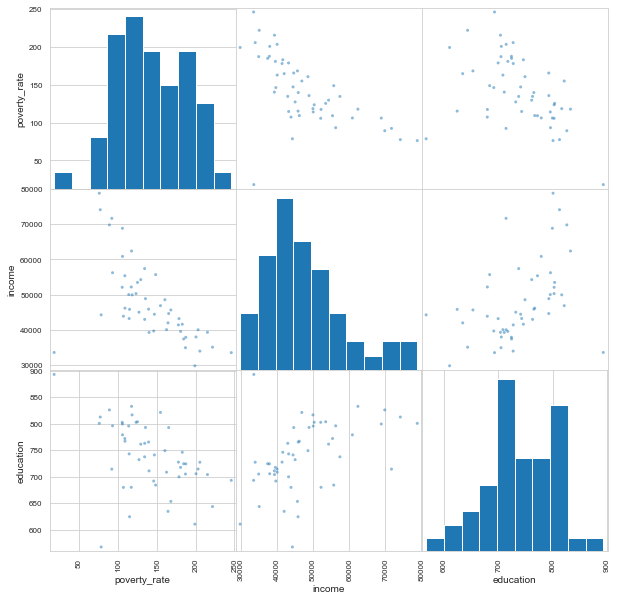

In [155]:
pd.plotting.scatter_matrix(state_data[['poverty_rate', 'income', 'education']], figsize=(10, 10));

**Income and education have a positive but weak correlation. This means that with high levels of education, there is high levels of income.**

**Income and poverty have a worthy negative correlation; meaning that high levels of poverty relate to low levels of income.**

**There is a weak negative correlation between education and poverty. This means that low education levels relate to high poverty levels.**

- I will look at the top and bottom five states in terms of poverty, income and education.

In [156]:
#poor|rich states
poor_states = state_data['poverty_rate'].sort_values(ascending=False).head(5)
rich_states = state_data['poverty_rate'].sort_values(ascending=True).head(5)

In [157]:
poor_states, rich_states

(state
 MS    246.044199
 AZ    221.889135
 GA    215.406699
 AR    205.609982
 LA    203.341772
 Name: poverty_rate, dtype: float64,
 state
 DC    18.000000
 NJ    76.143119
 CT    77.375000
 WY    78.549020
 MA    89.170732
 Name: poverty_rate, dtype: float64)

In [158]:
high_inc = state_data['income'].sort_values(ascending=False).head(5)
low_inc = state_data['income'].sort_values(ascending=True).head(5)

In [159]:
high_inc, low_inc

(state
 NJ    78832.957798
 CT    74141.520833
 MD    71692.177606
 MA    69822.195122
 NY    68863.528428
 Name: income, dtype: float64,
 state
 NM    29773.024831
 MS    33512.030387
 DC    33564.000000
 AR    33948.611830
 WV    34913.782716
 Name: income, dtype: float64)

In [160]:
high_educ = state_data['education'].sort_values(ascending=False).head(5)
low_educ = state_data['education'].sort_values(ascending=True).head(5)

In [161]:
high_educ, low_educ

(state
 DC    893.000000
 HI    832.735099
 MA    826.004065
 ME    821.261538
 WI    816.635779
 Name: education, dtype: float64,
 state
 WY    567.490196
 NM    610.611738
 NV    624.503817
 AK    634.670423
 AZ    643.731707
 Name: education, dtype: float64)

*These states standout from the above analysis:*

**MA low poverty, high income, high education**

**DC low poverty, low income and high education**

**NJ, CT low poverty, high income**

**WY low poverty, low education**

**MS, AR high poverty and low income**

**AZ high poverty and low education**

## 2. Top5 states

In [162]:
top5_states = killings.groupby('state')['state'].count().sort_values(ascending=False).head(5)

In [163]:
top5_states

state
CA    424
TX    225
FL    154
AZ    118
OH     79
Name: state, dtype: int64

**At this point, *AZ* stands out in the top5 states with most killings; and also has high poverty and low education levels.**

- I will select economic data of the top5 states with most killings:

In [164]:
top5_data = state_data.query('@state_data.index in @top5_states.index')

In [165]:
top5_data

,share_asian,share_black,share_hispanic,share_native_american,share_white,poverty_rate,income,education
state,,,,,,,,
AZ,6.503326,10.960089,182.332594,229.121951,557.541020,221.889135,35057.401330,643.731707
CA,50.938239,24.346912,267.308147,15.869908,634.827201,148.695795,55697.653088,684.221419
FL,14.952070,123.931373,147.265795,4.345316,709.960784,160.605664,48552.166667,749.193900
OH,6.695473,36.909465,20.644444,6.383539,815.370370,135.600000,48856.190123,792.947325
TX,9.198054,51.793360,308.781339,7.001717,718.241557,168.230109,45645.395535,653.486548


In [166]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,high,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,high,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,medium,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,high,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,high,Not fleeing,False


In [167]:
killings['race'] = killings['race'].astype('category')

In [168]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   category      
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   category      
 7   race                     2535 non-null   category      
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   category      
 12  flee                     2535 non-

In [169]:
#group state killings by race
race_count = killings.groupby(['state', 'race'])['race'].count()
race_count.name = 'race_count'

In [170]:
state_race_count = race_count.reset_index(level='race')

- I will select the top5 states and their counts of killings.

In [171]:
top5_race = state_race_count.query('@state_race_count.index in @top5_states.index')

In [172]:
top5_race

,race,race_count
state,,
AZ,A,0
AZ,B,5
AZ,H,37
AZ,N,8
AZ,O,0
AZ,W,68
CA,A,15
CA,B,65
CA,H,169


- I will create a dataframe that contains the percentage share ofeach race killed in each of the top5 states.

In [254]:
race_pivot = top5_race.pivot_table(index=top5_race.index, values='race_count', columns='race', aggfunc=['sum'])
race_pivot.columns = ['sum_asian', 'sum_black', 'sum_hispanic', 'sum_natives', 'sum_others', 'sum_whites']
race_pivot.drop('sum_others', axis=1, inplace=True)

In [255]:
race_share = top5_data[['share_asian', 'share_black', 'share_hispanic', 'share_native_american', 'share_white']]

In [256]:
top5_race_data = pd.concat([race_pivot, race_share], axis=1)
top5_race_data['share_black']['CA'] = 240
top5_race_data

,sum_asian,sum_black,sum_hispanic,sum_natives,sum_whites,share_asian,share_black,share_hispanic,share_native_american,share_white
state,,,,,,,,,,
AZ,0,5,37,8,68,6.503326,10.960089,182.332594,229.121951,557.541020
CA,15,65,169,1,166,50.938239,240.000000,267.308147,15.869908,634.827201
FL,1,49,18,0,84,14.952070,123.931373,147.265795,4.345316,709.960784
OH,2,30,0,0,45,6.695473,36.909465,20.644444,6.383539,815.370370
TX,2,46,66,1,107,9.198054,51.793360,308.781339,7.001717,718.241557


In [257]:
top5_race_data['%_asian'] = round((top5_race_data['sum_asian'] / top5_race_data['share_asian']) * 100)
top5_race_data['%_black'] = round((top5_race_data['sum_black'] / top5_race_data['share_black']) * 100)
top5_race_data['%_hispanic'] = round((top5_race_data['sum_hispanic'] / top5_race_data['share_hispanic']) * 100)
top5_race_data['%_natives'] = round((top5_race_data['sum_natives'] / top5_race_data['share_native_american']) * 100)
top5_race_data['%_whites'] = round((top5_race_data['sum_whites'] / top5_race_data['share_white']) * 100)

In [258]:
top5_race_data.drop(['sum_asian', 'sum_black', 'sum_hispanic', 'sum_natives', 'sum_whites',
       'share_asian', 'share_black', 'share_hispanic', 'share_native_american',
       'share_white'], axis=1, inplace=True)

In [259]:
top5_race_pc = top5_race_data.astype(np.int64)

In [260]:
top5_race_pc

,%_asian,%_black,%_hispanic,%_natives,%_whites
state,,,,,
AZ,0,46,20,3,12
CA,29,27,63,6,26
FL,7,40,12,0,12
OH,30,81,0,0,6
TX,22,89,21,14,15


In [261]:
races = top5_race_pc.columns
races

Index(['%_asian', '%_black', '%_hispanic', '%_natives', '%_whites'], dtype='object')

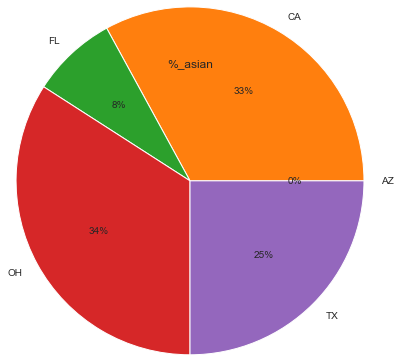

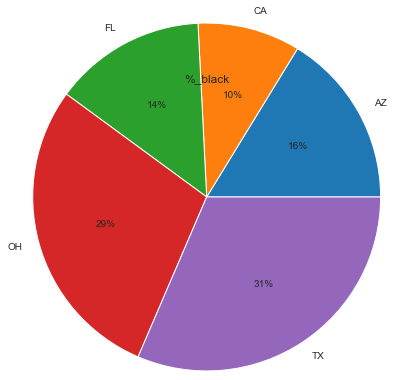

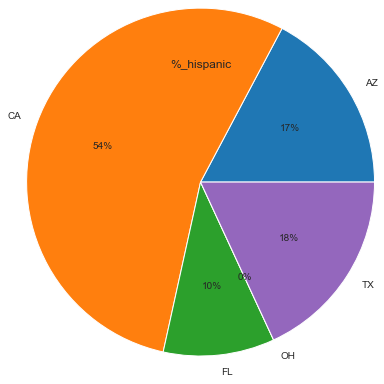

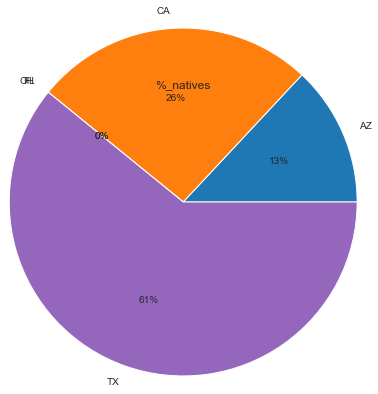

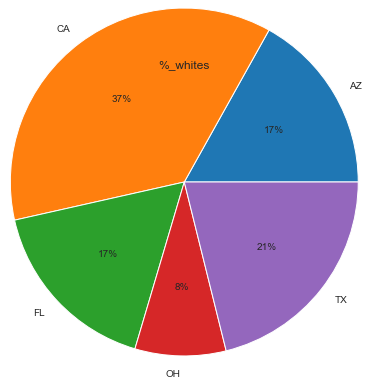

In [262]:
#a visualization of each race by state
for race in races:
    values= top5_race_pc[race]
    labels= top5_race_pc.index
    plt.axis('equal')
    plt.title(race)
    plt.pie(values, labels=labels, radius=2, autopct='%0.0f%%')
    plt.show();

**Blacks have a generally higher percentage of killings in each state compared to other races.**

**TX has a large share of killings of Native Americans and Blacks.**

**CA has a large share of killings of Whites, Hisapnics and Asians.**

## 3. Profile of a person killed by police

In [263]:
killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,high,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,high,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,medium,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,high,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,high,Not fleeing,False


In [264]:
race_avg_age = killings.groupby('race')['age'].mean()

In [265]:
race_avg_age.name = 'average_age'

In [266]:
print(race_avg_age)

race
A    36.538462
B    31.669903
H    33.018913
N    30.451613
O    33.071429
W    39.942693
Name: average_age, dtype: float64


In [267]:
race_avg_age.mean()

34.11550197750503

In [268]:
killings.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [269]:
males = len(killings[killings['gender'] == 'M'])
females = len(killings[killings['gender'] == 'F'])
total = killings.shape[0]

In [270]:
males, females, total

(2428, 107, 2535)

In [271]:
males_pc = round((males / total) * 100)
females_pc = round((females / total) * 100)

In [272]:
males_pc, females_pc

(96, 4)

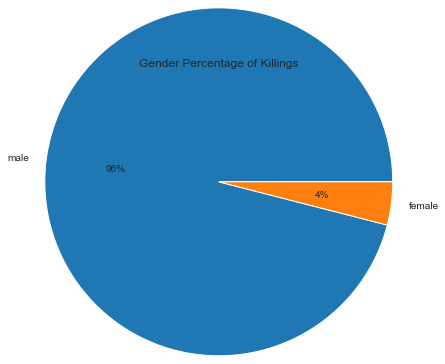

In [273]:
plt.axis('equal')
plt.title('Gender Percentage of Killings')
plt.pie([males_pc, females_pc], labels=['male', 'female'], radius=2, autopct='%0.0f%%')
plt.show();

**The average profile of a victim killed by police is a Black male, aged 34 years and most likely living in TX.**

**The average profile of a victim killed by police is a Hisapnic male, aged 34 years and most likely living in CA.**

## 4. Justification of killings

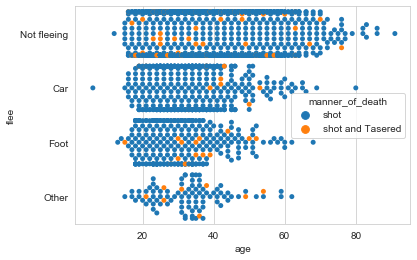

In [274]:
sns.swarmplot(data=killings,
         x='age',
         y='flee',
         hue='manner_of_death')

plt.show()

**Victims of police shootings averagely between the age of 20 and 45 were either not fleeing, or fleeing by car and foot.**

**Victims aged 50 and beyond were mostly shot when not fleeing.**

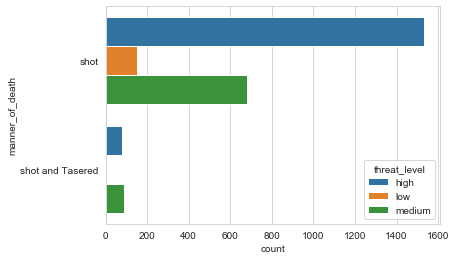

In [275]:
sns.countplot(data=killings,
         y="manner_of_death",
         hue='threat_level')

plt.show()

**Majority of victims who were shot were a high threat level.**

**Victims who were shot and tasered were both high and medium threat levels.**

*It can be seen that majority of the killings were justified as victims who were high and medium threat levels.*